In [1]:
#importações importantes
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
# Imports
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")
%matplotlib inline
import random as rnd

In [2]:
#importando o dataset
df = pd.read_excel('telemetria.xlsx')

In [3]:
#verificando o shape do nosso data set
df.shape

(46501, 4)

In [4]:
#primeiras linhas do data set
df.head()

,Data,Veículo,Alarme,Alarmes por Veículo
0,01/08/2022,14108,ACIONAMENTO INDEVIDO DE EMBREAGEM,32
1,01/08/2022,14108,CURVA BRUSCA À DIREITA,32
2,01/08/2022,14108,EXCESSO VELOCIDADE - TELEMETRIA,32
3,01/08/2022,14108,RPM FORA DE FAIXA VERDE EM ACLIVE,32
4,01/08/2022,14109,ACIMA DA FAIXA VERDE,67


In [5]:
#ultimas linhas do nosso data set
df.tail(5)

,Data,Veículo,Alarme,Alarmes por Veículo
46496,31/08/2022,14278,ACIONAMENTO INDEVIDO DE EMBREAGEM,82
46497,31/08/2022,14278,CURVA BRUSCA À DIREITA,82
46498,31/08/2022,14278,EXCESSO VELOCIDADE - TELEMETRIA,82
46499,31/08/2022,14278,OCIOSO,82
46500,31/08/2022,14278,RPM FORA DE FAIXA VERDE EM ACLIVE,82


In [6]:
#verificando se tem valores nulos dentro do meu dataset
df.isnull().values.any()

False

In [7]:
#primeiro preciso dos tipos de alarmes:
al = df['Alarme'].unique()
#alarme = [x for x in al]

## tem que agurupar por alarme antes de trocar os valores

In [8]:
#preparando dados, a coluna diabetes possui valores de texto e precisamos converter em valores numericos
alarmes_map = {'ACIONAMENTO INDEVIDO DE EMBREAGEM':1.0,'CURVA BRUSCA À DIREITA':7.0,'EXCESSO VELOCIDADE - TELEMETRIA':10.0,
             'RPM FORA DE FAIXA VERDE EM ACLIVE':2.0,'ACIMA DA FAIXA VERDE':3.0,'OCIOSO':0,'CURVA BRUSCA À ESQUERDA':7.5, 
              'FREADA BRUSCA':10.9,'ABAIXO DA FAIXA VERDE':2.5,'PONTO MORTO IRREGULAR':2.75,'FAIXA DE PONTÊNCIA':2.8,
              'RPM EXCEDIDO':3.5,'ACELERAÇAO BRUSCA':8,'ACIMA DA FAIXA DE POTÊNCIA':3.6}

In [9]:
#aplicando o mapeamento ao dataset
df['Alarme'] =  df['Alarme'].map(alarmes_map)

In [10]:
#verificando a mudança
df.head()

,Data,Veículo,Alarme,Alarmes por Veículo
0,01/08/2022,14108,1.0,32
1,01/08/2022,14108,7.0,32
2,01/08/2022,14108,10.0,32
3,01/08/2022,14108,2.0,32
4,01/08/2022,14109,3.0,67


In [11]:
#modificar a data para um digito apenas
Dia = [str(x[:2]) for x in df['Data']]

In [12]:
df['Dia'] =Dia

In [13]:
df.head()

,Data,Veículo,Alarme,Alarmes por Veículo,Dia
0,01/08/2022,14108,1.0,32,01
1,01/08/2022,14108,7.0,32,01
2,01/08/2022,14108,10.0,32,01
3,01/08/2022,14108,2.0,32,01
4,01/08/2022,14109,3.0,67,01


In [14]:
#criando a coluna total alarmes que vai ser a multiplicaçao entre o valor do alarme  e a coluna alarmes por veiculo
total = [x*df['Alarme'] for x in df['Alarmes por Veículo']]

In [15]:
#inserir coluna no dataframa
df['Total De Alarmes'] = total

In [16]:
df.head()

,Data,Veículo,Alarme,Alarmes por Veículo,Dia,Total De Alarmes
0,01/08/2022,14108,1.0,32,01,0 32.0 1 224.0 2 320.0 3...
1,01/08/2022,14108,7.0,32,01,0 32.0 1 224.0 2 320.0 3...
2,01/08/2022,14108,10.0,32,01,0 32.0 1 224.0 2 320.0 3...
3,01/08/2022,14108,2.0,32,01,0 32.0 1 224.0 2 320.0 3...
4,01/08/2022,14109,3.0,67,01,0 67.0 1 469.0 2 670.0 3...


In [17]:
#soma dos codigos do alarme
group = df.groupby(['Veículo'])['Total De Alarmes'].count()

In [18]:
df['total'] = df['Total De Alarmes']

In [19]:
df.head()

,Data,Veículo,Alarme,Alarmes por Veículo,Dia,Total De Alarmes,total
0,01/08/2022,14108,1.0,32,01,0 32.0 1 224.0 2 320.0 3...,0 32.0 1 224.0 2 320.0 3...
1,01/08/2022,14108,7.0,32,01,0 32.0 1 224.0 2 320.0 3...,0 32.0 1 224.0 2 320.0 3...
2,01/08/2022,14108,10.0,32,01,0 32.0 1 224.0 2 320.0 3...,0 32.0 1 224.0 2 320.0 3...
3,01/08/2022,14108,2.0,32,01,0 32.0 1 224.0 2 320.0 3...,0 32.0 1 224.0 2 320.0 3...
4,01/08/2022,14109,3.0,67,01,0 67.0 1 469.0 2 670.0 3...,0 67.0 1 469.0 2 670.0 3...


In [20]:
group2 = df.groupby(['Veículo'])['Alarmes por Veículo'].sum()


In [21]:
group3 = df.groupby(['Veículo'])['Alarme'].sum()

In [22]:
data =  pd.DataFrame()

In [23]:
data['carro'] =  df['Veículo'].unique()

In [24]:
data.head(3)

,carro
0,14108
1,14109
2,14111


In [25]:
data['sum_alarmes'] =  group2.values

In [26]:
data.head(5)

,carro,sum_alarmes
0,14108,47327
1,14109,21258
2,14111,37114
3,14112,13367
4,14113,16310


In [27]:
data['um_tipes'] =  group3.values

In [28]:
data.head()

,carro,sum_alarmes,um_tipes
0,14108,47327,1283.95
1,14109,21258,969.15
2,14111,37114,1049.90
3,14112,13367,928.15
4,14113,16310,841.80


## calculando o valor entre tipos e soma dos alarmes, esse valor tambem será dado como entrada no modelo

In [29]:
l = list(data['sum_alarmes'])
l2 = list(data['um_tipes'])
total = []

In [30]:
for i, x in enumerate(l):
    total.append(0.00001/100*(x*l2[i]))

In [31]:
len(total)

158

In [32]:
data['total_reduced'] =  total

In [33]:
data.head(5)

,carro,sum_alarmes,um_tipes,total_reduced
0,14108,47327,1283.95,6.076550
1,14109,21258,969.15,2.060219
2,14111,37114,1049.90,3.896599
3,14112,13367,928.15,1.240658
4,14113,16310,841.80,1.372976


In [34]:
data.drop(['total'], axis=1, inplace=True)

KeyError: "['total'] not found in axis"

### para terminar essa parte, preciso saber a media de alarmes
Esse valor será usado para calculo da variavel target do modelo

In [35]:
media =  data['sum_alarmes'].mean()

In [36]:
media

28518.03164556962

## Agora vamos partir para o calculo do valor da variavel target
#### algumas considerações importantes:
Eu não possuo no momento dados sobre os carros que acidentaram no ultimo mês, por essa razão utilizarei dados fictcios baseados em quantidade de alarmes
A intenção é que o algoritmo consiga realizar a predição do possivel acidente baseado nos mesmos parametros que usei para simulação de acidente dos veiculos.
 Assim sendo quando eu possuir dados reais de acidente precisarei voltar a treinar o modelo para que ele identifique os reais padroes de acidente
 Estou usando o valor dos alarmes subtraido o valor da media, caso o valor seja acima da media, o veiculo passara a ter o valor ultrapassado da media convertido em valores percentuais, de chance de se envolver em acidente, caso contrario, teremos a operação inversa informado que o veiculo possui chances baixissimas de se envolver em um acidente, isso tudo baseado nos alarmes coletados pela telemetria

In [37]:
def calc_chance(valor,p):
    p = valor*100/p
    p = round(p,2)
    return p

In [38]:
#variavel target precisa saber o percentual de chances do veiculo se envolver em acidentes:

target = []
for x in data['sum_alarmes']:
   
    if x > media:
        p = calc_chance((x-media),x)
        target.append(p)
    else:
        p = calc_chance((x-media),x)
      
        
        target.append(round(rnd.random(),2))
     


In [39]:
data['acidente'] =  target

In [40]:
data

,carro,sum_alarmes,um_tipes,total_reduced,acidente
0,14108,47327,1283.95,6.076550,39.74
1,14109,21258,969.15,2.060219,0.20
2,14111,37114,1049.90,3.896599,23.16
3,14112,13367,928.15,1.240658,0.73
4,14113,16310,841.80,1.372976,0.95
...,...,...,...,...,...
153,14126,49041,1383.05,6.782616,41.85
154,14174,17253,1106.20,1.908527,0.29
155,14196,35207,1296.55,4.564764,19.00
156,14143,13147,613.00,0.805911,0.75


In [41]:
#vamos verificar o nosso data set
data.head()

,carro,sum_alarmes,um_tipes,total_reduced,acidente
0,14108,47327,1283.95,6.076550,39.74
1,14109,21258,969.15,2.060219,0.20
2,14111,37114,1049.90,3.896599,23.16
3,14112,13367,928.15,1.240658,0.73
4,14113,16310,841.80,1.372976,0.95


In [42]:
data.tail(5)

,carro,sum_alarmes,um_tipes,total_reduced,acidente
153,14126,49041,1383.05,6.782616,41.85
154,14174,17253,1106.20,1.908527,0.29
155,14196,35207,1296.55,4.564764,19.00
156,14143,13147,613.00,0.805911,0.75
157,14169,7922,1017.65,0.806182,0.33


<AxesSubplot:>

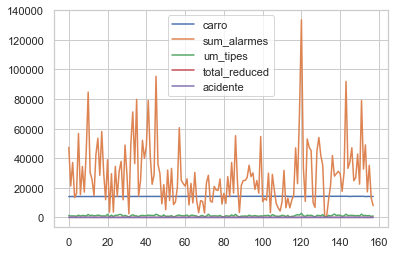

In [43]:
data.plot()


In [46]:
#dentificando correlaçao entre variaveis
#correlação não implica causualidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

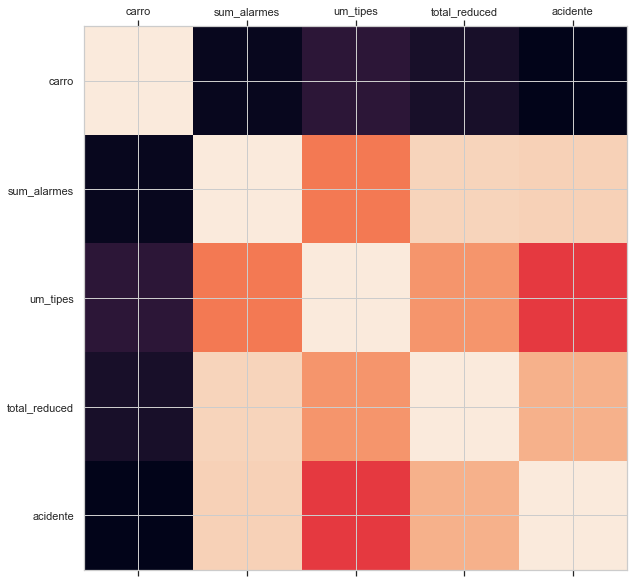

In [47]:
plot_corr(data)

In [48]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva-- se  valor de uma variavel aumenta o valor da  outra tambem aumenta
# 0   = não há correlação 
# -1  = forte correlação negativa -- se o valor de uma variavel aumenta o valor de outra variavel diminui
data.corr()

,carro,sum_alarmes,um_tipes,total_reduced,acidente
carro,1.000000,-0.112296,-0.001475,-0.063293,-0.134917
sum_alarmes,-0.112296,1.000000,0.684384,0.929962,0.922034
um_tipes,-0.001475,0.684384,1.000000,0.754214,0.533348
total_reduced,-0.063293,0.929962,0.754214,1.000000,0.827427
acidente,-0.134917,0.922034,0.533348,0.827427,1.000000


## Spliting

In [49]:
import sklearn as sk
sk.__version__

'1.0.2'

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
data.head(2)

,carro,sum_alarmes,um_tipes,total_reduced,acidente
0,14108,47327,1283.95,6.076550,39.74
1,14109,21258,969.15,2.060219,0.20


In [121]:
#vamos tentar reduzir casas decimais no total_reduced
data['total_reduced'] = round(data['total_reduced'])

In [122]:
data.head()

,carro,sum_alarmes,um_tipes,total_reduced,acidente
0,14108,47327,1283.95,6.0,39.74
1,14109,21258,969.15,2.0,0.20
2,14111,37114,1049.90,4.0,23.16
3,14112,13367,928.15,1.0,0.73
4,14113,16310,841.80,1.0,0.95


In [135]:
#criando nosso conjunto de entrada e saida
entrada= ['sum_alarmes','um_tipes','total_reduced']
saida = ['acidente']

In [170]:
# Criando objetos
x = data[entrada].values
y = data[saida].values
y=y.astype('int')

In [171]:
x

array([[4.73270e+04, 1.28395e+03, 6.00000e+00],
       [2.12580e+04, 9.69150e+02, 2.00000e+00],
       [3.71140e+04, 1.04990e+03, 4.00000e+00],
       [1.33670e+04, 9.28150e+02, 1.00000e+00],
       [1.63100e+04, 8.41800e+02, 1.00000e+00],
       [5.67610e+04, 1.50125e+03, 9.00000e+00],
       [1.53010e+04, 9.45250e+02, 1.00000e+00],
       [3.44320e+04, 1.32115e+03, 5.00000e+00],
       [1.70770e+04, 1.16260e+03, 2.00000e+00],
       [4.46940e+04, 1.02725e+03, 5.00000e+00],
       [8.47010e+04, 1.98135e+03, 1.70000e+01],
       [3.03840e+04, 1.16450e+03, 4.00000e+00],
       [2.55560e+04, 1.47180e+03, 4.00000e+00],
       [1.46720e+04, 1.06875e+03, 2.00000e+00],
       [4.25540e+04, 1.21130e+03, 5.00000e+00],
       [5.35300e+04, 1.50630e+03, 8.00000e+00],
       [2.84470e+04, 1.35130e+03, 4.00000e+00],
       [5.81010e+04, 8.85100e+02, 5.00000e+00],
       [2.99360e+04, 1.08910e+03, 3.00000e+00],
       [1.19630e+04, 9.00150e+02, 1.00000e+00],
       [3.89590e+04, 2.08925e+03, 8.0000

In [172]:
#70% para treino e 30% para testes
split_test_size =  0.30

In [173]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size = split_test_size, random_state = 42)

In [174]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(data.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(data.index)) * 100))

69.62% nos dados de treino
30.38% nos dados de teste


## Construido o modelo de Machine learning

In [175]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Esse agoritimo de classificação gausian e estatistico

In [176]:
#criando o modelo preditivo
modelo_v1 =  GaussianNB()

In [177]:
# Treinando o modelo
modelo_v1.fit(X_treino,Y_treino)

GaussianNB()

## testando a  acurácia do modelo

In [178]:
from sklearn import metrics

In [179]:
nb_predict_train = modelo_v1.predict(X_treino)

In [180]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.9909

